In [276]:
import random
import numpy as np
import scipy
import networkx as nx
import matplotlib.pyplot as plt
import os

In [117]:
import warnings
warnings.filterwarnings("ignore", category=UserWarning)

### Zadanie 1 Prosty ranking wierzchołków

In [257]:
def generateGraph(N,p):
    G = nx.DiGraph()
    for u in range(N):
        for v in range(u+1, N):
            if random.random() < p:
                G.add_edge(u, v)
            if random.random() < p:
                G.add_edge(v, u)
            if random.random() < p:
                G.add_edge(u,u)
    plt.figure(figsize=(10, 10))
    pos = nx.spring_layout(G)
    nx.draw_networkx_labels(G, pos)
    nx.draw(G, pos)
    A = nx.to_scipy_sparse_matrix(G, dtype=float)
    return A

[ 5.000e-01+0.j     1.000e+00+0.j     7.110e-01+0.j     2.556e-01+0.359j
  2.556e-01-0.359j -1.919e-01+0.269j -1.919e-01-0.269j -3.250e-01+0.j
 -2.046e-01+0.j     4.333e-01+0.j     2.491e-01+0.176j  2.491e-01-0.176j
 -8.171e-16+0.j     2.041e-02+0.j     1.726e-01+0.j   ]


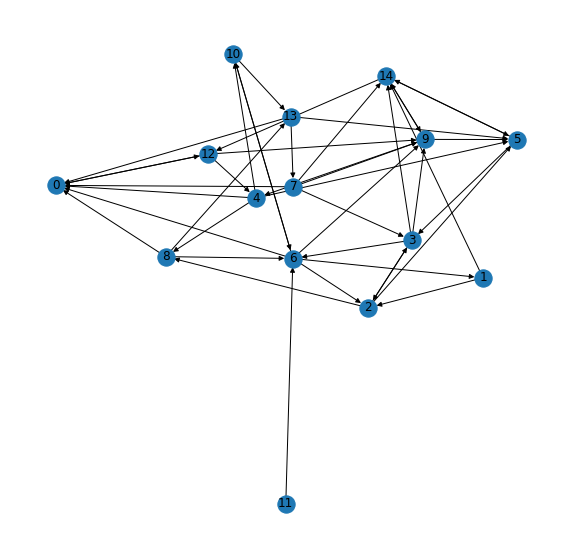

In [246]:
N = 15
G = generateGraph(N,0.2)

Nu = scipy.sparse.linalg.norm(A, ord=0, axis=1)

Nu = Nu.astype('float') 
for i in range (len(Nu)):
    if(Nu[i] > 0):
        Nu[i] = 1/Nu[i]

A = A.T.multiply(Nu).T

eigvals, _ = np.linalg.eig(A.todense())
np.set_printoptions(precision=3)

print(eigvals)

### Zadanie 2 Page Rank

In [333]:
def pageRank(A,d,e,eps=0.2,maxIter=200):
    Nu = scipy.sparse.linalg.norm(A, ord=0, axis=1)
    Nu = Nu.astype('float') 
    for i in range (len(Nu)):
        if(Nu[i] > 0):
            Nu[i] = 1/Nu[i]
            
    A = A.T.multiply(Nu).T
    
    B = d*A.todense().T+(1-d)*e
    Rprev = e
    for i in range (1,maxIter):
        Rcur = B@Rprev
        d = np.linalg.norm(Rprev,ord=1) - np.linalg.norm(Rcur,ord=1)
        Rcur += d*e
        if(np.linalg.norm(Rcur-Rprev,ord=1) < eps):
            return Rcur
    return Rcur

#### Testy ręczne

[[0.162 0.264 0.222 0.11  0.174 0.167 0.114 0.144 0.162 0.207]]
[[0.164 0.26  0.22  0.114 0.175 0.168 0.118 0.147 0.164 0.206]]
[[0.165 0.256 0.219 0.119 0.176 0.169 0.123 0.149 0.165 0.205]]
[[0.167 0.252 0.217 0.123 0.177 0.171 0.127 0.152 0.167 0.204]]
[[0.172 0.24  0.212 0.137 0.18  0.175 0.14  0.16  0.172 0.202]]
[[0.09  0.212 0.303 0.039 0.085 0.172 0.278 0.086 0.165 0.304]]


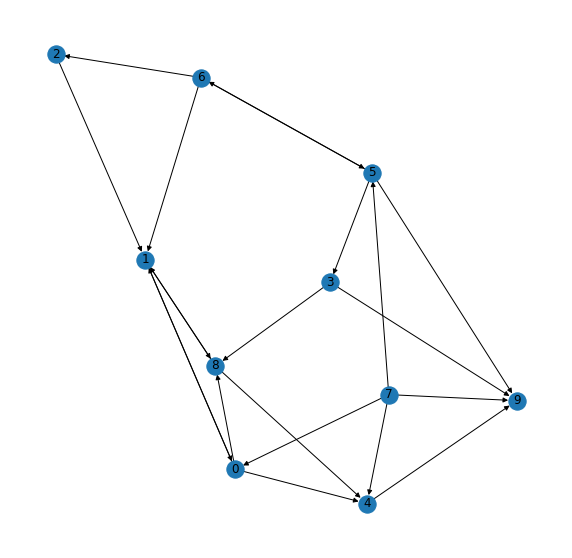

In [334]:
N = 10
A = generateGraph(N,0.2)

e = np.full((N), 1/N)
print(pageRank(A,0.9,e))
print(pageRank(A,0.85,e))
print(pageRank(A,0.8,e))
print(pageRank(A,0.75,e))
print(pageRank(A,0.6,e))

e = [0.05,0.05,0.2,0.02,0.03,0.05,0.3,0.05,0.05,0.2]
e = np.asarray(e)
print(pageRank(A,0.9,e))

#### Test dla grafu z snap.standford

In [303]:
def createMatrixFromFile(directory,nodesCount):
    A = [[0 for _ in range(nodesCount)]for _ in range(nodesCount)]
    for file in os.listdir(directory):
        if file.endswith(".edges"):
            f = open(directory+file,"r")
            for line in f: 
                line = line.split()
                A[int(line[0])][int(line[1])] = 1
    return scipy.sparse.csr_matrix(A)

##### ego-Facebook
This dataset consists of 'circles' (or 'friends lists') from Facebook. Facebook data was collected from survey participants using this Facebook app. The dataset includes node features (profiles), circles, and ego networks.

In [335]:
N = 4039
A = createMatrixFromFile("facebook/",N)
e = np.full((N), 1/N)
print(pageRank(A,0.9,e))

[[0.    0.    0.    ... 0.    0.    0.001]]
